In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from isingm import *

In [60]:
def animate(data, fname, fps, colormap = 'gray', nice = False):
    fig, ax = plt.subplots()
    im = ax.imshow(data[0], animated = True, cmap= colormap, vmin=-1, vmax=1)

    if nice:
        ax.set_axis_off()                # hides axis ticks and frame
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # remove all padding

    def update(frame):
        im.set_array(data[frame])
        return [im]

    ani = anim.FuncAnimation(fig, update, frames=len(data), interval=1000/fps, blit=False)

    ani.save(fname, fps=fps)

    plt.close(fig)

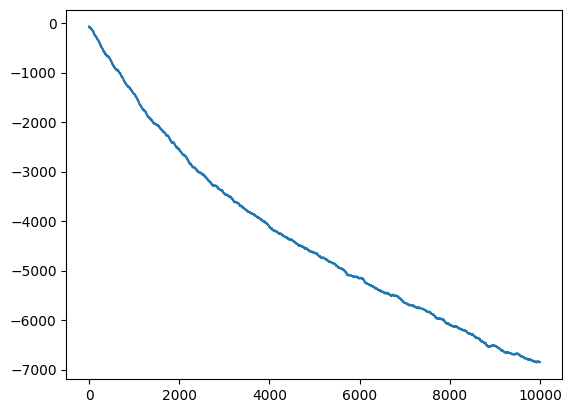

In [7]:
n = 100
a_in = randominitial(n)
steps = 10000
T = 1.9

step, u, a = mc_ising(int(steps), n, 1, T, a_in, frames = 100)
plt.plot(step, u)
plt.show()


animate(a, 'standrad.mp4', 20)

In [8]:

def mc_ising_H(steps:int, n,j,T,a_in, H = np.zeros((n,n), dtype = 'int'), frames = 1000):
    
    save_every = frames
    numsteps = steps/save_every

    a = a_in.copy()

    energies = np.empty(steps)

    E = energy(a,j,H)


    data = []

    for i in range(steps):
        energies[i] = E


        if i % numsteps == 0:
            data.append(a.copy())
        
        x = np.random.randint(0,n)
        y = np.random.randint(0,n)

        b = a.copy()
        b[x,y] *= -1

        dE = -(b[x,y] - a[x,y])*(j*(a[x,(y+1)%n] + a[(x+1)%n,y] + a[x,y-1] + a[x-1,y]) + H[x,y])

        '''if i % 100000 == 0:
            plt.imshow(a)
            plt.title(f"{i}th step")
            plt.show()
        '''
        
        if dE <= 0 or np.random.rand() <= np.exp(-dE * T**(-1)):
            E += dE
            a = b.copy()

    return np.arange(steps), energies, np.array(data), a_in


In [12]:


def mc_ising_Ht(steps:int, n,j,T,a_in, magnetic_field, *args, dtype = 'int', frames = 1000):
    
    save_every = frames
    numsteps = steps/save_every

    a = a_in.copy()

    e_m_f = np.empty((steps,3))

    H = lambda t: magnetic_field(t,n,*args)

    E = energy_H(a,j,H(0))

    M = magnetization(a)
    data = []

    for i in range(steps):
        e_m_f[i] = [E,M,np.sum(H(i))]

        if i % numsteps == 0:
            data.append(a.copy())
        
        x = np.random.randint(0,n)
        y = np.random.randint(0,n)

        b = a.copy()
        b[x,y] *= -1

        dE = -(b[x,y] - a[x,y])*(j*(a[x,(y+1)%n] + a[(x+1)%n,y] + a[x,y-1] + a[x-1,y]) + H(i)[x,y])

        '''if i % 100000 == 0:
            plt.imshow(a)
            plt.title(f"{i}th step")
            plt.show()
        '''
        
        if dE <= 0 or np.random.rand() <= np.exp(-dE * T**(-1)):
            E += dE
            a = b.copy()
            M = magnetization(a)

    return np.arange(steps), e_m_f, np.array(data)

In [64]:
def osc_Ht(t,n,omega, amplitude):
    return np.ones((n,n))*np.sin(omega*t)*amplitude

In [87]:
H = osc_Ht
steps = 300000
n = 100
T = 1.2
a_in = randominitial(n)
r = n//2
omega = 0.00005
amplitude = 20

steps, emf, a =  mc_ising_Ht(steps, n, 1, T, a_in, H, omega, amplitude, frames = 100)

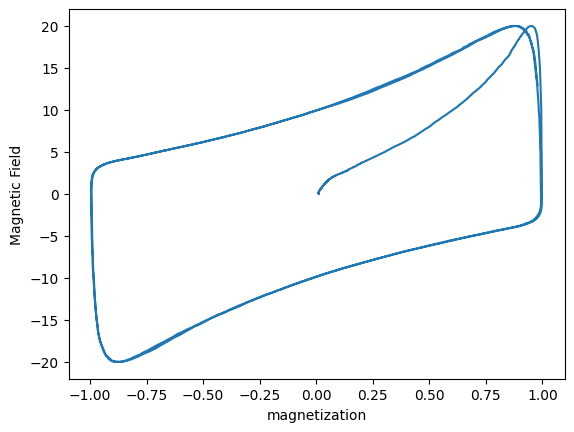

In [89]:
plt.plot(emf[0:,1]/n**2, emf[0:,2]/n**2)
plt.xlabel('magnetization')
plt.ylabel('Magnetic Field')
plt.show()

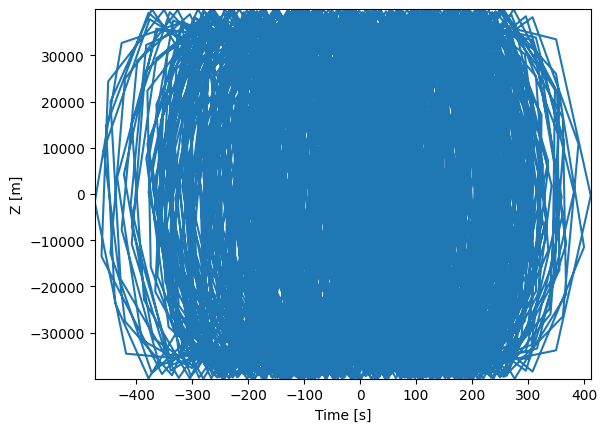

In [73]:
fig, ax = plt.subplots()
x = emf[::100,1]
y = emf[::100,2]
line = ax.plot(x[0],y[0])[0]
ax.set(xlim=[min(x),max(x)], ylim=[min(y),max(y)], xlabel='Time [s]', ylabel='Z [m]')


def draw(frame):
    # for each frame, update the data stored on each artist.
    # update the scatter plot:
    line.set_xdata(x[:frame])
    line.set_ydata(y[:frame])
    # update the line plot:
    return [line]


ani = anim.FuncAnimation(fig=fig, func=draw, frames=len(x), interval=10)

ani.save('hysteresis.mp4', fps = 20)

plt.show()
